In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_customers=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
df_pay=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_order_payments_dataset.csv')
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
df_orders=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/e_commerce/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##  RFM analysis

+ R: Recency : Le dernier achat de ce client remonte à combien de jours? (Сколько дней назад была совершена последняя покупка этого клиента?)

+ F: Frequency : Combien d'achats ce client a-t-il effectués dans votre entreprise depuis son inscription? (Сколько покупок совершил этот клиент в вашей компании с момента регистрации?)

+ M: Monetarity : Combien d'argent ce client a-t-il dépensé dans votre entreprise? (Сколько денег этот клиент потратил в вашей компании?)

Cette technique nous permet de mieux comprendre notre client en vérifiant la date de son dernier achat, combien de fois il a déjà acheté et combien il a dépensé avec notre entreprise.

Le cœur de l'analyse RFM consiste à calculer le score R, F, M et à regrouper les clients et à créer une étiquette sur chaque cluster.

Этот метод позволяет нам лучше понять наших клиентов, проверяя дату их последней покупки, сколько раз они уже покупали и сколько они потратили в нашей компании. Суть RFM-анализа состоит в том, чтобы рассчитать оценку R, F, M и сгруппировать клиентов, а также присвоить каждому кластеру какую-либо метку.

In [301]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [302]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [303]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [304]:
df1=df_orders[~(df_orders['order_status']=='canceled')]

In [305]:
df1=df1.dropna(axis=0, how='all', subset=['order_delivered_customer_date'])

In [306]:
df1=df1[['order_id', 'customer_id', 'order_purchase_timestamp']]

In [307]:
df1.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [308]:
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [309]:
df2=df_pay[['order_id', 'payment_value']]

In [310]:
df1=df1.merge(df2, how='left', on='order_id')
df1.head()

,order_id,customer_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12


In [311]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [312]:
df3=df_customers[['customer_id', 'customer_unique_id']]

In [313]:
df1=df1.merge(df3, how='left', on='customer_id')

In [314]:
df1.head()

,order_id,customer_id,order_purchase_timestamp,payment_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12,3a653a41f6f9fc3d2a113cf8398680e8


In [315]:
df1=df1.drop('customer_id', axis=1)

In [316]:
df1=df1[['customer_unique_id', 'order_id','order_purchase_timestamp', 'payment_value']]

In [317]:
df1.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [318]:
def make_rfm_data(df1,days):
    grouped = df1.groupby(['customer_unique_id'])
    rfm_data= grouped.agg({'payment_value': 'sum',
                           'order_id': 'count',
                           'order_purchase_timestamp': 'max'})

    rfm_data.rename(columns={'order_purchase_timestamp': "R",
                             'order_id': 'F',
                             'payment_value': 'M'}, inplace=True)

    last_date = rfm_data['R'].max() + pd.to_timedelta(days, 'D')  #### 1 день добавляем
    rfm_data['R'] = last_date - rfm_data['R']
    rfm_data['R'] = rfm_data['R'].dt.days
    
    rfm_data = rfm_data.reset_index()
    rfm_data = rfm_data[['customer_unique_id', 'R', 'F', 'M']]

    return rfm_data.set_index('customer_unique_id')

In [319]:
rfm_data = make_rfm_data(df1,1)
rfm_data.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [320]:
#rfm_data['R'] = pd.to_datetime(rfm_data['R']).dt.date

In [321]:
#rfm_data.head()

In [322]:
# rfm_data.isna().sum()

R: Recency : Le dernier achat de ce client remonte à combien de jours? (Сколько дней назад была совершена последняя покупка этого клиента?)

Remplacez AAAA-MM-JJ "R" par la différence en jours depuis la dernière date déterminée spécifiquement par le chercheur.

Измените ГГГГ-ММ-ДД «R» на разницу в днях с последней даты, которая специально определена исследователем.

In [323]:
#rfm_data['R'] = pd.to_datetime(rfm_data['R'])
#last_date = rfm_data['R'].max() + pd.to_timedelta(1, 'D')  #### 1 день добавляем

#rfm_data['R'] = last_date - rfm_data['R']
#rfm_data['R'] = rfm_data['R'].dt.days

#display(rfm_data.info(), rfm_data.head(5))

In [324]:
rfm_data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
R,93350.0,237.950070,152.589932,1.0,9.00,23.00,42.0,114.00,219.00,346.0000,466.000,520.0000,575.0000,714.00
F,93350.0,1.079261,0.449135,1.0,1.00,1.00,1.0,1.00,1.00,1.0000,1.000,2.0000,2.0000,33.00
M,93350.0,165.196388,226.322448,0.0,22.75,32.69,40.1,63.05,107.78,182.5475,318.058,469.6605,1097.0769,13664.08


+ Donc, ici, nous pouvons voir que nous avons des valeurs aberrantes dans les groupes Fréquence et Monétaire. Ainsi, ils doivent être abandonnés et analysés séparément.

+ Итак, здесь мы видим, что у нас есть выбросы в группах «Частота» и «Валюта». Таким образом, они должны быть отброшены и проанализированы отдельно.

+ Важно сохранить это все.

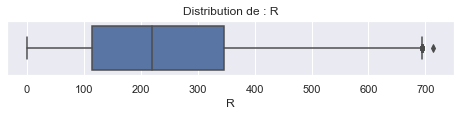

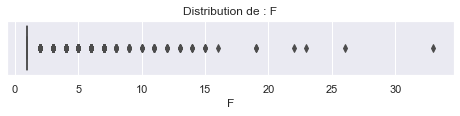

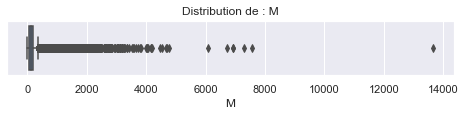

In [325]:
var_num = rfm_data[['R', 'F', 'M']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=rfm_data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [326]:
rfm_data['F'].value_counts(normalize=True)*100

1     94.146760
2      4.907338
3      0.561328
4      0.167113
5      0.074987
6      0.052491
7      0.032137
8      0.012855
9      0.009641
11     0.007499
12     0.005356
10     0.004285
13     0.004285
14     0.003214
15     0.003214
19     0.002142
26     0.001071
16     0.001071
22     0.001071
23     0.001071
33     0.001071
Name: F, dtype: float64

In [327]:
rfm_data['F'].apply(lambda x: 'less or equal to 6' if x<=6 else 'greater than 6')\
            .value_counts(normalize=True) * 100

less or equal to 6    99.910016
greater than 6         0.089984
Name: F, dtype: float64

In [328]:
#Je suppose qu'ici, nous ne devrions sélectionner que des valeurs de fréquence supérieures à 6, car ce faisant, nous ne #supprimons que 0,08% des enregistrements.

#Я предполагаю, что здесь мы должны выбрать только значения частоты, которые больше 6, потому что при этом мы отбрасываем #только 0,08% записей.

In [329]:
# rfm_data = rfm_data[rfm_data['F'] <= 6]


In [330]:
rfm_data['M'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
90%        318.058000
95%        469.660500
99%       1097.076900
max      13664.080000
Name: M, dtype: float64

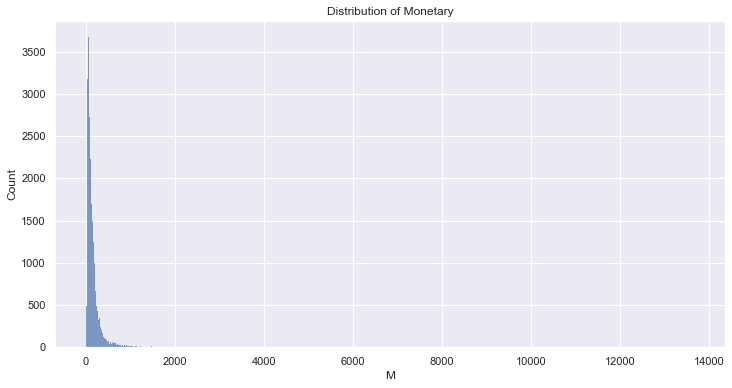

In [331]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary')
sns.histplot(rfm_data['M']);


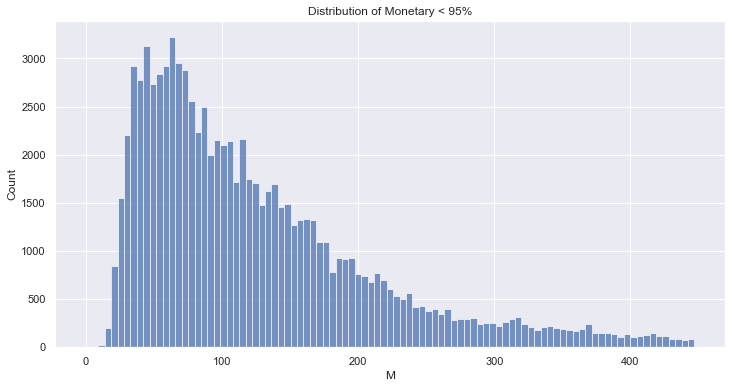

In [332]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.histplot(rfm_data[rfm_data['M']<447].M);


In [333]:
# rfm_data = rfm_data[rfm_data['M'] < 447]

## R, F, M groups

J'ai utilisé des quantiles pour attribuer des scores de récence et monétaire:
+ les groupes sont 0-33, 33-66, 66-100 quantiles

Pour Frequency j'ai décidé de les regrouper à la main:
+ score=1 si la valeur de fréquence est 1
+ 1 <fréquence < 7 si la valeur de score est 2
+ sinon, le score sera de 3



In [334]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       93350 non-null  int64  
 1   F       93350 non-null  int64  
 2   M       93350 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


In [335]:
rfm_data['R'].quantile([0.3333333333333333, 0.6666666666666667,1])

0.333333    149.0
0.666667    290.0
1.000000    714.0
Name: R, dtype: float64

In [336]:
rfm_data['R'].describe()

count    93350.000000
mean       237.950070
std        152.589932
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
max        714.000000
Name: R, dtype: float64

In [337]:
rfm_data['M'].quantile([0.3333333333333333, 0.6666666666666667,1])

0.333333       75.17
0.666667      151.77
1.000000    13664.08
Name: M, dtype: float64

In [338]:
rfm_data['M'].describe()

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
max      13664.080000
Name: M, dtype: float64

In [339]:
def make_group(df):
    df['R_group'] = pd.cut(df['R'], [0, 149, 290, 715], labels = [1, 2, 3]).astype(str)
    df['F_group'] = df['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  # 3
    df['M_group'] = pd.cut(df['M'], [-0.1, 75.17, 151.77, 13665], labels = [1, 2, 3]).astype(str)
    return df

In [340]:
make_group(rfm_data)

,R,F,M,R_group,F_group,M_group
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,3,1,3
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,2,1,2
ffff371b4d645b6ecea244b27531430a,568,1,112.46,3,1,2


In [341]:
# Récence: 1 - l'achat a été effectué il y a peu de temps, 3 - l'achat a été effectué il y a longtemps
# Monétaire: 1 - petit montant d'achat, 3 - gros montant d'achat
 

rfm_data['R_group'] = pd.qcut(rfm_data['R'], 3, labels = [1, 2, 3]).astype(str)

rfm_data['F_group'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  # 3

rfm_data['M_group'] = pd.qcut(rfm_data['M'], 3, labels = [1, 2, 3]).astype(str)

In [342]:
rfm_data.head()

,R,F,M,R_group,F_group,M_group
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3


In [343]:
rfm_data.loc[(rfm_data.R_group =='3') & (rfm_data.M_group =='1')]

,R,F,M,R_group,F_group,M_group
customer_unique_id,,,,,,
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1
0006fdc98a402fceb4eb0ee528f6a8d4,408,1,29.00,3,1,1
000bfa1d2f1a41876493be685390d6d3,335,1,46.85,3,1,1
00191a9719ef48ebb5860b130347bf33,498,1,58.86,3,1,1
001a2bf0e46c684031af91fb2bce149d,426,1,36.73,3,1,1
...,...,...,...,...,...,...
ffedff0547d809c90c05c2691c51f9b7,518,1,32.42,3,1,1
ffeefd086fc667aaf6595c8fe3d22d54,337,1,62.94,3,1,1
fff1afc79f6b5db1e235a4a6c30ceda7,364,1,50.09,3,1,1


In [344]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        93350 non-null  int64  
 1   F        93350 non-null  int64  
 2   M        93350 non-null  float64
 3   R_group  93350 non-null  object 
 4   F_group  93350 non-null  object 
 5   M_group  93350 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.0+ MB


###  Première segmentation : séquence de chiffres de Score


In [345]:
rfm_data['RFM_group_total'] =rfm_data['R_group'] + rfm_data['F_group'] + rfm_data['M_group']

In [346]:
rfm_data.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213


+ MAIN - "123", "133", - les plus récents, fréquents, générateurs de revenus - les principaux clients, qui doivent être considérés comme les clients les plus précieux  (самые последние, частые, приносящие доход — основные клиенты, которых следует рассматривать как наиболее ценных клиентов).


+ GONE - '311', '312', '313' - disparu, jetable - ces clients sont probablement partis (ушли, одноразовые - эти клиенты, вероятно, ушли).


+ NOUVEAU - '111', '112', '113' - vient de rejoindre - a récemment rejoint de nouveaux clients (только что присоединились - недавно присоединившиеся новые клиенты).


+ BALEINES - "233", "133", "223", "123", "323", "333", "213" - les baleines les plus rentables et génératrices de revenus (самые прибыльные — киты, приносящие доход).


+ FIDÉLITÉ - '221', '222', '321', '322', '231', '232', '331', '332' - utilisateurs fidèles (лояльные пользователи).


+ RÉGULIER - "121", "122", "211", "212", - utilisateurs moyens - clients ordinaires, rien ne se démarque (средние пользователи — обычные клиенты, ничем не выделяющиеся).

In [347]:
def segment(x):
    if x == ['123', '133']:
        return 'Main'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Nouveau'
    elif x in ["233", "133", "223", "123", "323", "333", "213"]:
        return 'Baleines'
    elif x in ['221', '222', '321', '322', '231', '232', '331', '332']:
        return 'Fidélité'
    else:
        return 'Regulier'

In [348]:
rfm_data['segments'] = rfm_data["RFM_group_total"].apply(segment)

In [349]:
rfm_data.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines


In [350]:
segmentwise = rfm_data.groupby('segments').agg(RecencyMean = ('R', 'mean'),
                                          FrequencyMean = ('F', 'mean'),
                                          MonetaryMean = ('M', 'mean'),
                                          GroupSize = ('R', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Baleines,221.479455,1.307517,329.158052,12266
Fidélité,330.689825,2.417396,86.346734,1828
Gone,418.821430,1.000000,162.660576,29081
Nouveau,76.314516,1.000000,164.419097,29547
Regulier,216.058755,1.050223,79.375852,20628


In [351]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [352]:
import squarify

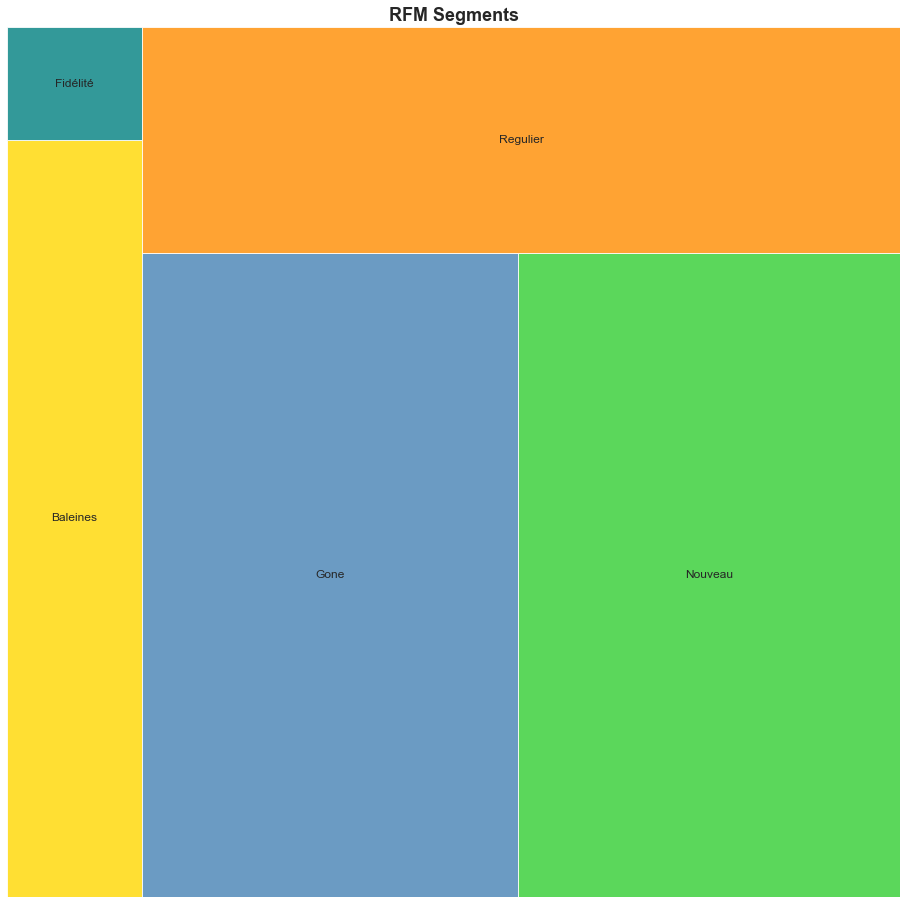

In [353]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### Clustering customers

In [354]:
rfm_data.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines


In [355]:
percentile = [0.25, 0.5, 0.75, 0.9, 0.99]
rfm_data.R.describe(percentile)

count    93350.000000
mean       237.950070
std        152.589932
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
90%        466.000000
99%        575.000000
max        714.000000
Name: R, dtype: float64

In [356]:
rfm_data.F.describe(percentile)

count    93350.000000
mean         1.079261
std          0.449135
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
90%          1.000000
99%          2.000000
max         33.000000
Name: F, dtype: float64

In [357]:
rfm_data.M.describe(percentile)

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
90%        318.058000
99%       1097.076900
max      13664.080000
Name: M, dtype: float64

In [358]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R                93350 non-null  int64  
 1   F                93350 non-null  int64  
 2   M                93350 non-null  float64
 3   R_group          93350 non-null  object 
 4   F_group          93350 non-null  object 
 5   M_group          93350 non-null  object 
 6   RFM_group_total  93350 non-null  object 
 7   segments         93350 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.9+ MB


Les valeurs de F, M sont totalement biaisées comme on le voit plus haut.


Je les normaliserai à l'étape suivante pour la segmentation au lieu de supprimer les valeurs aberrantes pour éviter de perdre les données.

In [359]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

In [360]:
rfm_data_cluster=rfm_data[['R', 'F', 'M']]

In [361]:

rfm_data_cluster.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [362]:
stsc=StandardScaler()

rfm_data_scaled_st = stsc.fit_transform(rfm_data_cluster)
rfm_data_scaled_st= pd.DataFrame(rfm_data_scaled_st, columns=['R', 'F', 'M'], index=rfm_data_cluster.index)    
rfm_data_scaled_st.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.825420,-0.176475,-0.102935
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.805759,-0.176475,-0.609781
0000f46a3911fa3c0805444483337064,1.959838,-0.176475,-0.348957
0000f6ccb0745a6a4b88665a16c9f078,0.544272,-0.176475,-0.537185
0004aac84e0df4da2b147fca70cf8255,0.328005,-0.176475,0.140038


In [363]:
rfm_data_scaled_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       93350 non-null  float64
 1   F       93350 non-null  float64
 2   M       93350 non-null  float64
dtypes: float64(3)
memory usage: 5.3+ MB


In [364]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

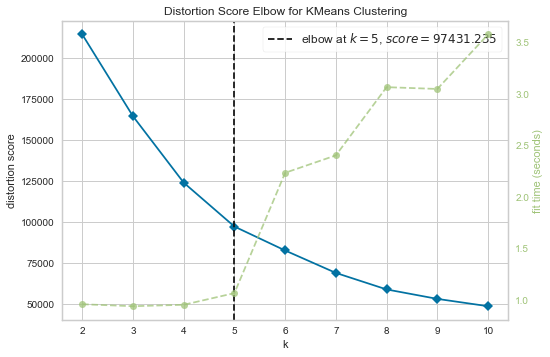

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [365]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(rfm_data_scaled_st)    # Fit the data to the visualizer
visualizer.poof()


In [366]:
km = KMeans(n_clusters = 5, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled_st)

rfm_data['cluster'] = clusters
rfm_data.head()

,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,0
0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,1


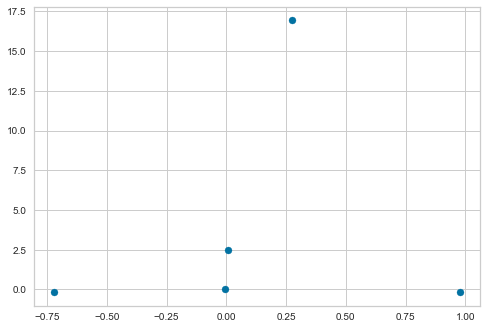

In [367]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]);

In [368]:
rfm_data['cluster'].value_counts().sort_index()

0    49308
1    36324
2     2436
3     5149
4      133
Name: cluster, dtype: int64

In [369]:
rfm_data=rfm_data.reset_index()

In [370]:
segment_cluster=pd.DataFrame(rfm_data.groupby(['cluster', 'segments'], as_index=False)
                            ['customer_unique_id'].count())
segment_cluster=segment_cluster.rename({'customer_unique_id': 'count'}, axis=1)
segment_cluster

,cluster,segments,count
0,0,Baleines,6286
1,0,Nouveau,28761
2,0,Regulier,14261
3,1,Baleines,2449
4,1,Fidélité,4
5,1,Gone,28280
6,1,Regulier,5591
7,2,Baleines,849
8,2,Gone,801
9,2,Nouveau,786


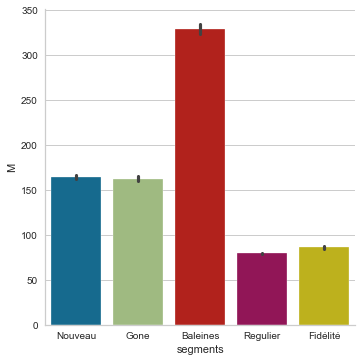

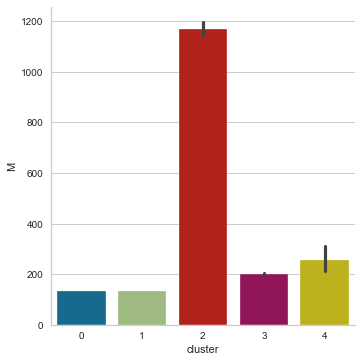

In [371]:
sns.catplot(x="segments", y="M",  kind="bar",data=rfm_data)
sns.catplot(x="cluster", y="M",  kind="bar",data=rfm_data)

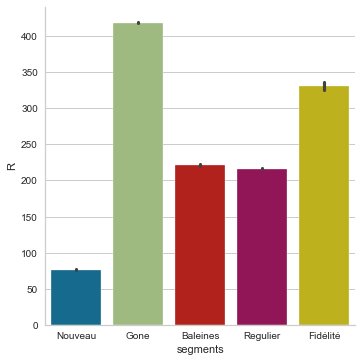

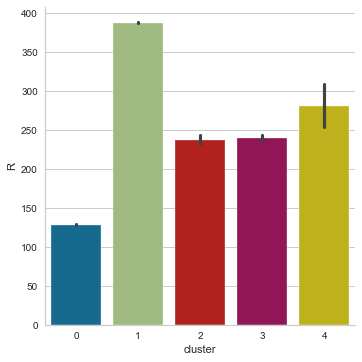

In [372]:
sns.catplot(x="segments", y="R",  kind="bar",data=rfm_data);
sns.catplot(x="cluster", y="R",  kind="bar",data=rfm_data);

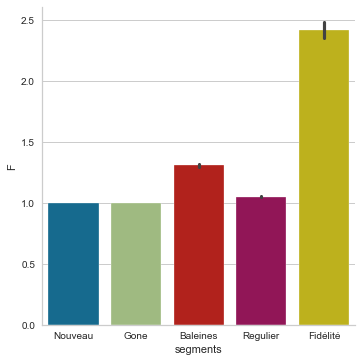

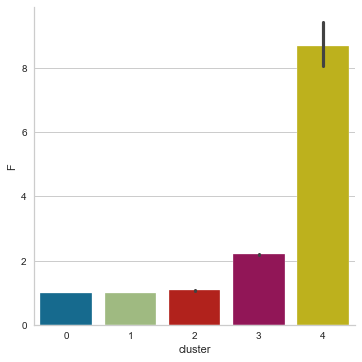

In [373]:
sns.catplot(x="segments", y="F",  kind="bar",data=rfm_data);
sns.catplot(x="cluster", y="F",  kind="bar",data=rfm_data);

En comparant la segmentation manuelle et le clustering, ainsi qu'en analysant les graphiques, nous pouvons tirer les conclusions suivantes :


+ Lors de la segmentation à la main, nous avons obtenu 5 segments (le segment "MAIN" est manquant). Lors du clustering, nous avons également obtenu 5 groupes.


+ Les graphiques nous aident à deviner que:

  + 0 - 'Gone'
  + 1 - 'Nouveau'
  + 2 - 'Fidélité'
  + 3 - 'Baleines'
  + 4 - 'Regulier'

In [374]:
rfm_data_cluster.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [375]:
rfm_data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93350 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       93350 non-null  int64  
 1   F       93350 non-null  int64  
 2   M       93350 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.3+ MB


In [376]:
mms = MinMaxScaler()

rfm_data_scaled = mms.fit_transform(rfm_data_cluster)
rfm_data_scaled= pd.DataFrame(rfm_data_scaled, columns=['R', 'F', 'M'], index=rfm_data_cluster.index)    
rfm_data_scaled.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.155680,0.0,0.010385
0000b849f77a49e4a4ce2b2a4ca5be3f,0.159888,0.0,0.001990
0000f46a3911fa3c0805444483337064,0.751753,0.0,0.006310
0000f6ccb0745a6a4b88665a16c9f078,0.448808,0.0,0.003192
0004aac84e0df4da2b147fca70cf8255,0.402525,0.0,0.014409


La bibliothèque Yellowbrick est une plate-forme de visualisation de diagnostic pour l'apprentissage automatique qui permet aux scientifiques des données de piloter le processus de sélection de modèles. Il étend l'API scikit-learn avec un nouvel objet principal : le moteur de rendu. Les visualiseurs permettent d'ajuster et de transformer les modèles dans le processus de pipeline scikit-learn, fournissant des diagnostics visuels tout au long de la transformation des données multidimensionnelles.

In [377]:
#pip install yellowbrick

Dans l'apprentissage automatique, les modèles de clustering sont des méthodes non supervisées qui tentent de découvrir des modèles dans des données non étiquetées. Il existe deux classes principales d'algorithmes de clustering : le clustering agglomératif, qui relie des points de données similaires, et le clustering centroïde, qui tente de trouver des centres ou des sections dans les données.

Yellowbrick fournit actuellement deux visualiseurs pour évaluer les mécanismes centroïdes, en particulier le clustering K-means, qui aident les utilisateurs à trouver le paramètre K optimal dans la métrique de clustering :

+ KElbowVisualizer visualise les clusters selon la fonction de score, en recherchant le "coude" sur la courbe.
+ Le SilhouetteVisualizer rend les estimations de silhouette de chaque cluster dans un seul modèle.

In [378]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#### Méthode du coude

Le KElbowVisualizer de Yellowbrick implémente la méthode « du coude » pour sélectionner le nombre optimal de clusters en ajustant le modèle K-Means avec une plage de valeurs pour K . Si le graphique linéaire ressemble à un bras, alors le « coude » (le point d'inflexion sur la courbe) est une bonne indication que le modèle sous-jacent s'adapte le mieux à ce point.

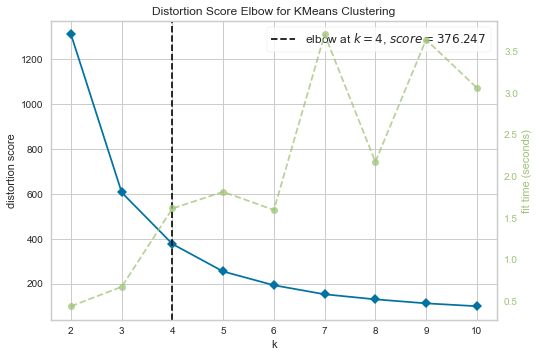

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [379]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(rfm_data_scaled)    # Fit the data to the visualizer
visualizer.poof()


# https://www.kaggle.com/code/kautumn06/yellowbrick-clustering-evaluation-examples/notebook

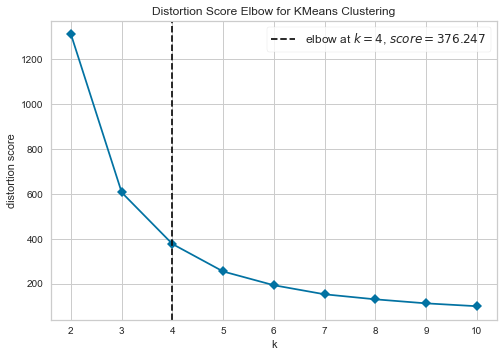

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [380]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=10, timings=False)

visualizer.fit(rfm_data_scaled)    # Fit the data to the visualizer
visualizer.poof()    


# Le KElbowVisualizer affiche également le temps nécessaire pour ajuster le modèle par K , 
# qui peut être masqué en définissant timings=False.

#### Visualiseur de silhouettes

L'analyse de silhouette peut être utilisée pour évaluer la densité et la séparation entre les clusters. Le score est calculé en faisant la moyenne du coefficient de silhouette pour chaque échantillon, qui est calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale. Cela produit un score compris entre -1 et +1, où les scores proches de +1 indiquent une séparation élevée et les scores proches de -1 indiquent que les échantillons ont peut-être été affectés au mauvais groupe.

Le SilhouetteVisualizer affiche le coefficient de silhouette pour chaque échantillon sur une base par grappe, permettant aux utilisateurs de visualiser la densité et la séparation des grappes. Ceci est particulièrement utile pour déterminer le déséquilibre du cluster ou pour sélectionner une valeur pour K en comparant plusieurs visualiseurs.

Depuis que nous avons créé l'exemple de jeu de données pour ces exemples, nous savons déjà que les points de données sont regroupés en 4 clusters. Ainsi, pour le premier exemple de SilhouetteVisualizer, nous allons définir K sur 8 afin de montrer à quoi ressemble le tracé lors de l'utilisation de la valeur optimale de K .

In [381]:
# pip install numpy==x.y.z

In [382]:
# pip install numpy==1.21.4

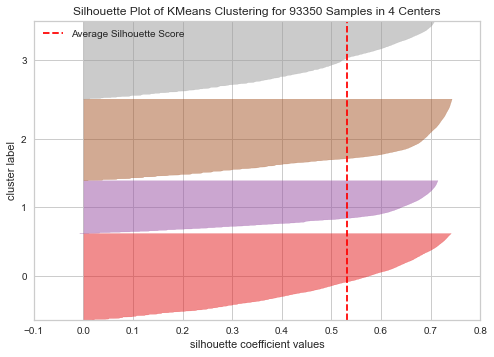

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93350 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [383]:
model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_data_scaled)    # Fit the data to the visualizer
visualizer.poof()

La largeur de chaque silhouette est proportionnelle au nombre d'échantillons affectés au cluster.

In [384]:
rfm_data.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,1


In [385]:
km = KMeans(n_clusters = 4, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled)

rfm_data['cluster'] = clusters
rfm_data.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2


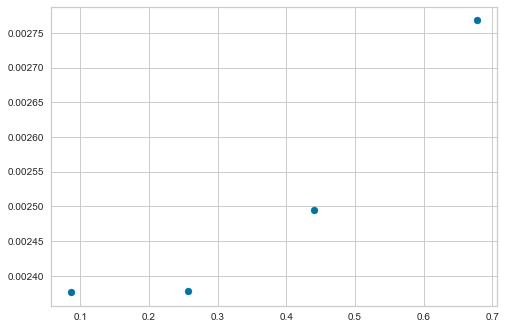

In [386]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]);

In [387]:
rfm_data['cluster'].value_counts().sort_index()

0    27070
1    16495
2    24297
3    25488
Name: cluster, dtype: int64

In [388]:
segment_cluster=pd.DataFrame(rfm_data.groupby(['cluster', 'segments'], as_index=False)
                            ['customer_unique_id'].count())
segment_cluster=segment_cluster.rename({'customer_unique_id': 'count'}, axis=1)
segment_cluster

,cluster,segments,count
0,0,Baleines,7290
1,0,Fidélité,566
2,0,Nouveau,5525
3,0,Regulier,13689
4,1,Baleines,422
5,1,Fidélité,547
6,1,Gone,15526
7,2,Baleines,3708
8,2,Fidélité,715
9,2,Gone,13555


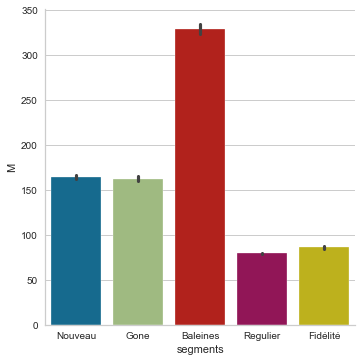

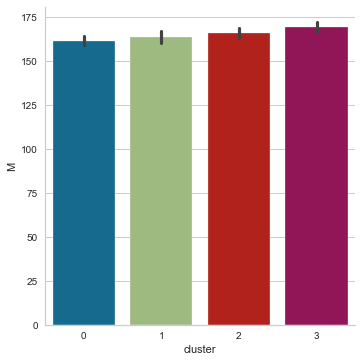

In [389]:
sns.catplot(x="segments", y="M",  kind="bar",data=rfm_data)
sns.catplot(x="cluster", y="M",  kind="bar",data=rfm_data)

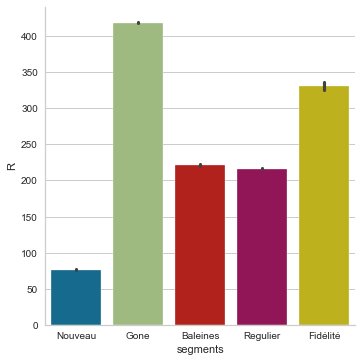

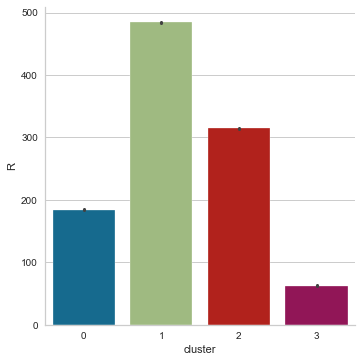

In [390]:
sns.catplot(x="segments", y="R",  kind="bar",data=rfm_data);
sns.catplot(x="cluster", y="R",  kind="bar",data=rfm_data);

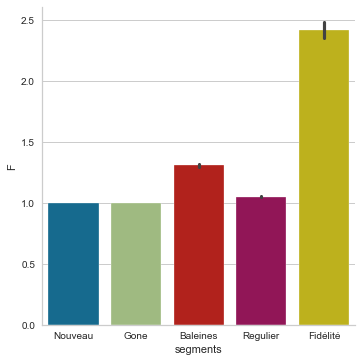

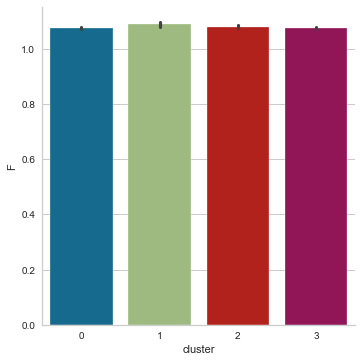

In [391]:
sns.catplot(x="segments", y="F",  kind="bar",data=rfm_data);
sns.catplot(x="cluster", y="F",  kind="bar",data=rfm_data);

Lorsqu'ils sont regroupés en 4 classes, nous pouvons conclure que les segments "Fidélité" et "Regulier" sont combinés en une seule classe.

Les graphiques nous aident à deviner que:
 
  + 0 - 'Fidélité', 'Regulier'
  + 1 - 'Baleines'
  + 2 - 'Nouveau'
  + 3 - 'Gone'

In [392]:
df_stat_cluster = rfm_data.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
df_stat_cluster

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.076099  161.569101  184.227595  0.391892  201.238663  35.154012
1        1.088572  163.565716  484.118218  0.570887  242.492210  58.646511
2        1.079845  165.966921  314.657447  0.468514  229.687329  43.357709
3        1.076036  169.369607   62.572034  0.394306  237.099583  36.004811

In [393]:
df_stat_segments=rfm_data.pivot_table(index = 'segments', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
df_stat_segments

mean                               std                        
                 F           M           R         F           M           R
segments                                                                    
Baleines  1.307517  329.158052  221.479455  0.835614  293.414320   79.796466
Fidélité  2.417396   86.346734  330.689825  1.435824   35.748043  120.030276
Gone      1.000000  162.660576  418.821430  0.000000  237.290423   84.941309
Nouveau   1.000000  164.419097   76.314516  0.000000  230.286562   43.552687
Regulier  1.050223   79.375852  216.058755  0.326729   35.314621   49.715543

###  Classification des clients selon le score RFM

J'ai choisi de diviser les données R, F, M en 5 groupes par plage de centiles.


Dans le cas de F, presque chaque valeur est 1, de sorte que je me suis divisé en seulement 3 groupes.


Par conséquent, nos clients sont subdivisés en 75 sous-groupes (5 x 3 x 5).

In [394]:
rfm_data.R.describe()

count    93350.000000
mean       237.950070
std        152.589932
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
max        714.000000
Name: R, dtype: float64

In [395]:
rfm_data['R'].quantile([0.2,0.4,0.6,0.8,1])

0.2     92.0
0.4    177.0
0.6    268.0
0.8    382.0
1.0    714.0
Name: R, dtype: float64

In [396]:
rfm_data.M.describe()

count    93350.000000
mean       165.196388
std        226.322448
min          0.000000
25%         63.050000
50%        107.780000
75%        182.547500
max      13664.080000
Name: M, dtype: float64

In [397]:
rfm_data['M'].quantile([0.2,0.4,0.6,0.8,1])

0.2       55.26
0.4       87.36
0.6      132.69
0.8      208.55
1.0    13664.08
Name: M, dtype: float64

In [398]:
def make_score(df):
    df['R_score'] = pd.cut(df['R'], [0, 92, 177, 268, 382, 715], labels = [5,4,3,2,1]).astype(str)
    df['F_score'] = df['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  # 3
    df['M_score'] = pd.cut(df['M'], [-0.1, 55.26, 87.36, 132.69, 208.55, 13665], labels = [1, 2, 3,4,5]).astype(str)
    return df

In [399]:
make_score(rfm_data)

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,3,1,3,313,Gone,1,1,1,5
93346,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,2,1,2,212,Regulier,2,3,1,2
93347,ffff371b4d645b6ecea244b27531430a,568,1,112.46,3,1,2,312,Gone,1,1,1,3
93348,ffff5962728ec6157033ef9805bacc48,119,1,133.69,1,1,2,112,Nouveau,3,4,1,4


In [400]:
# Récence : 1 - l'achat a été effectué il y a longtemps
# Monetary: 1 - petit montant d'achat, 5 - gros montant d'achat

rfm_data['R_score'] = pd.qcut(rfm_data['R'], 5, labels = [5, 4, 3, 2, 1])\
                      .astype(str)

# rfm_data['F_score'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2')

rfm_data['F_score'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2' if 1<x<7 else '3')  ##### 2

rfm_data['M_score'] = pd.qcut(rfm_data['M'], 5, labels = [1, 2, 3, 4, 5])\
                      .astype(str)
rfm_data.head()


# Nombres maximum - les meilleures performances.

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4


In [401]:
rfm_data.loc[(rfm_data.R_score <='2') & (rfm_data.M_score >='3')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4
8,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,3,1,2,312,Gone,1,1,1,4
11,00082cbe03e478190aadbea78542e933,283,1,126.26,2,1,2,212,Regulier,2,2,1,3
14,000a5ad9c4601d2bbdd9ed765d5213b3,384,1,91.28,3,1,2,312,Gone,2,1,1,3
18,000de6019bb59f34c099a907c151d855,377,1,257.44,3,1,3,313,Gone,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93323,ffebb6424578e7bb153322da9d65634f,591,1,665.70,3,1,3,313,Gone,1,1,1,5
93331,ffef0ffa736c7b3d9af741611089729b,457,1,139.07,3,1,2,312,Gone,1,1,1,4
93336,fff3a9369e4b7102fab406a334a678c3,384,1,102.74,3,1,2,312,Gone,2,1,1,3
93345,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,3,1,3,313,Gone,1,1,1,5


Nous sommes capables de mieux interpréter le résultat de l'analyse:


+ client avec R,F,M(1, 1, 5) : nous pouvons supposer que ce client aurait quitté l'entreprise (клиент ушел из компании).


+ client avec R,F,M(5, 5, 5) : nous devrions considérer ce client comme VVIP de l'entreprise.


+ client avec R,F,M(5, 5, 2) : ce client est fidèle même s'il a dépensé moins d'argent (клиент лояльный, даже если он / она потратил меньшую сумму денег).


+ client avec R,F,M(5, 1, 5) : ce client sera le nouveau client important. Il est possible qu'il/elle devienne VIP à l'avenir, nous devons donc suivre en permanence l'historique de ce client (этот клиент будет важным новым клиентом. Вполне возможно, что в будущем он/она станет VIP, соответственно мы должны постоянно отслеживать записи этого клиента).

#### La sommation pondérée du RFM.

Dans la plupart des cas d'analyse RFM, nous devons distinguer la simple sommation de chaque score R,F,M et leur sommation pondérée. (В большинстве случаев RFM-анализа мы должны различать простое суммирование каждого показателя R, F, M и их взвешенное суммирование)


Avec cette approche, nous sommes capables de mieux interpréter le résultat de l'analyse.

Par exemple, nous pouvons considérer le client avec le score R, F, M (5, 1, 1) et le client avec (1, 1, 5) comme ils sont dans le même groupe si nous additionnons simplement chaque score.  C'est la mauvaise approche dans notre cas.

La formule de score RFM est ci-dessous:

RFMi=W1∗Récence+W2∗Fréquence+W3∗Monétaire


(contrainte.SUM(W1,W2,W3)=1)

J'utiliserai la statistique de chaque groupe classé par K-means clustering pour obtenir CV (coefficient de variation) et éventuellement pour trouver W1, W2 et W3.

Я буду использовать статистику каждой группы, классифицированной кластеризацией K-средних, чтобы получить CV (коэффициент вариации) и, в конечном итоге, найти W1, W2 и W3.

In [402]:
cv_r_0 = df_stat_cluster[('std', 'R')][0] / df_stat_cluster[('mean', 'R')][0]
cv_r_1 = df_stat_cluster[('std', 'R')][1] / df_stat_cluster[('mean', 'R')][1]
cv_r_2 = df_stat_cluster[('std', 'R')][2] / df_stat_cluster[('mean', 'R')][2]
cv_r_3 = df_stat_cluster[('std', 'R')][3] / df_stat_cluster[('mean', 'R')][3]
# cv_r_4 = df_stat_cluster[('std', 'R')][4] / df_stat_cluster[('mean', 'R')][4]

w_R = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
w_R

0.11816704516362699

In [403]:
cv_f_0 = df_stat_cluster[('std', 'F')][0] / df_stat_cluster[('mean', 'F')][0]
cv_f_1 = df_stat_cluster[('std', 'F')][1] / df_stat_cluster[('mean', 'F')][1]
cv_f_2 = df_stat_cluster[('std', 'F')][2] / df_stat_cluster[('mean', 'F')][2]
cv_f_3 = df_stat_cluster[('std', 'F')][3] / df_stat_cluster[('mean', 'F')][3]
# cv_r_4 = df_stat_cluster[('std', 'F')][4] / df_stat_cluster[('mean', 'F')][4]


w_F = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
w_F


# Возможно потому что у меня значения абберонт, например, если я их уберу

0.2156267133668015

In [404]:
cv_m_0 = df_stat_cluster[('std', 'M')][0] / df_stat_cluster[('mean', 'M')][0]
cv_m_1 = df_stat_cluster[('std', 'M')][1] / df_stat_cluster[('mean', 'M')][1]
cv_m_2 = df_stat_cluster[('std', 'M')][2] / df_stat_cluster[('mean', 'M')][2]
cv_m_3 = df_stat_cluster[('std', 'M')][3] / df_stat_cluster[('mean', 'M')][3]
# cv_r_4 = df_stat_cluster[('std', 'M')][4] / df_stat_cluster[('mean', 'M')][4]


w_M = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
w_M

0.22597081858208362

In [405]:
W_R = w_R / (w_R + w_F + w_M)
W_F = w_F / (w_R + w_F + w_M)
W_M = w_M / (w_R + w_F + w_M)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.21110132722792052
Weight of Frequency: 0.38520964380970596
Weight of Monetary : 0.4036890289623734
Total sum of weight: 0.9999999999999998


À partir du processus ci-dessus, nous pouvons obtenir le score RFM total en utilisant le poids
(Из приведенного выше процесса мы можем получить общий балл RFM, используя вес).


In [406]:
rfm_data['RFM_score_total'] = (rfm_data['R_score'].astype('int64') * W_R / 5 * 100 \
                        + rfm_data['F_score'].astype('int64') * W_F / 2 * 100 \
                        + rfm_data['M_score'].astype('int64') * W_M / 5 * 100)

rfm_data.head()

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4,68.443711
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4,59.999658


In [407]:
rfm_data.RFM_score_total.describe()

count    93350.000000
mean        57.303868
std         14.185426
min         31.556289
25%         47.703850
50%         56.518176
75%         68.073438
max        119.260482
Name: RFM_score_total, dtype: float64

In [408]:
rfm_data.pivot_table(index = 'RFM_score_total', values=['R', 'F', 'M'], aggfunc=['mean', 'count'])

mean                         count            
                        F           M           R     F     M     R
RFM_score_total                                                    
31.556289        1.000000   39.681124  475.854550  3747  3747  3747
35.778316        1.000000   40.097757  315.601343  3424  3424  3424
39.630070        1.000000   70.990085  471.016751  3761  3761  3761
40.000342        1.000000   39.572169  218.891970  3786  3786  3786
43.852096        1.000000   70.491488  317.460657  3838  3838  3838
...                   ...         ...         ...   ...   ...   ...
106.964675       8.000000  171.915000  153.500000     2     2     2
110.816429       9.333333  636.315000  216.500000     6     6     6
111.186702       7.500000  157.755000   79.000000     2     2     2
115.038456       7.750000  849.370000  133.000000     4     4     4
119.260482       9.100000  540.751000   49.400000    10    10    10

[73 rows x 6 columns]

+ Je classerai les clients en 5 groupes selon le score RFM (Я разделю клиентов на 5 групп в соответствии с оценкой RFM).


+ À partir du tableau ci-dessous, nous pouvons déduire quel client sera utile pour notre entreprise ou sera le plus proche d'abandonner notre service (Из приведенной ниже таблицы мы можем сделать вывод, какой клиент будет полезен для нашего бизнеса или будет ближе всего к тому, чтобы отказаться от наших услуг).

In [409]:
rfm_data['class'] = pd.qcut(rfm_data.RFM_score_total, 5, labels = [5, 4, 3, 2, 1]).astype(str)
rfm_data.head(10)

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,1,2,112,Nouveau,3,4,1,4,68.443711,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Baleines,2,2,1,4,59.999658,3
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,1,1,3,113,Nouveau,0,4,1,4,68.443711,2
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
7,00053a61a98854899e70ed204dd4bafe,183,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
8,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,3,1,2,312,Gone,1,1,1,4,55.777631,3
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,129.76,2,1,2,212,Regulier,0,4,1,3,60.369930,3


In [410]:
rfm_data.loc[(rfm_data['class'] =='1')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
7,00053a61a98854899e70ed204dd4bafe,183,1,419.18,2,1,3,213,Baleines,0,3,1,5,72.295465,1
19,000e309254ab1fc5ba99dd469d36bdb4,66,2,78.42,1,2,2,122,Regulier,3,5,2,2,75.778658,1
22,000fbf0473c10fc1ab6f8d2d286ce20c,35,1,362.38,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
36,001928b561575b2821c92254a2327d06,5,1,164.81,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
42,001a34eb30ecb8e3aacb07c475ca4dd1,49,1,161.71,1,1,3,113,Nouveau,3,5,1,4,72.665737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93319,ffe96c782a5bc522bd8bad3bc638981a,31,1,245.22,1,1,3,113,Nouveau,3,5,1,5,80.739518,1
93321,ffe9e41fbd14db4a7361347c56af5447,200,1,220.88,2,1,3,213,Baleines,0,3,1,5,72.295465,1
93327,ffeddf8aa7cdecf403e77b2e9a99e2ea,108,2,204.20,1,2,3,123,Baleines,3,4,2,4,87.704193,1
93338,fff5eb4918b2bf4b2da476788d42051c,58,1,2844.96,1,1,3,113,Nouveau,3,5,1,5,80.739518,1


In [411]:
rfm_data.loc[(rfm_data['class'] =='5')]

,customer_unique_id,R,F,M,R_group,F_group,M_group,RFM_group_total,segments,cluster,R_score,F_score,M_score,RFM_score_total,class
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1,1,111,Nouveau,3,4,1,1,44.222369,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3,1,2,312,Gone,1,1,1,2,39.630070,5
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,1,1,311,Gone,2,2,1,1,35.778316,5
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38,1,1,1,111,Nouveau,0,4,1,1,44.222369,5
10,0006fdc98a402fceb4eb0ee528f6a8d4,408,1,29.00,3,1,1,311,Gone,1,1,1,1,31.556289,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,ffeefd086fc667aaf6595c8fe3d22d54,337,1,62.94,3,1,1,311,Gone,2,2,1,2,43.852096,5
93332,fff1afc79f6b5db1e235a4a6c30ceda7,364,1,50.09,3,1,1,311,Gone,2,2,1,1,35.778316,5
93339,fff699c184bcc967d62fa2c6171765f7,362,1,55.00,3,1,1,311,Gone,2,2,1,1,35.778316,5
93342,fffa431dd3fcdefea4b1777d114144f2,303,1,81.20,3,1,2,312,Gone,2,2,1,2,43.852096,5


Les clients de classe 1 sont utiles et intéressants pour notre entreprise. Les sommes de leurs achats sont élevées, et ils rachètent. De plus, ce sont de nouveaux clients que nous pouvons garder.

Les clients de la 5ème classe refusaient en règle générale nos services. Soit ils font des achats, mais rarement et pour de petites sommes.

In [412]:
# plt.axline((x1, y1), (x2, y2))

La signification statistique est une évaluation de la survenance d'un événement par hasard. Si le résultat est statistiquement significatif, cela signifie qu'il est peu probable qu'il soit obtenu en raison d'événements ou de fluctuations aléatoires.

Статистическая значимость - это оценка того, происходит ли событие в результате случайности. Если результат статистически значим, это означает, что его получение вследствие случайных событий или флуктуаций маловероятно. 

In [413]:
from scipy import stats

In [414]:
cls1_r = rfm_data[rfm_data['class'] == '1']['R']
cls2_r = rfm_data[rfm_data['class'] == '2']['R']
cls3_r = rfm_data[rfm_data['class'] == '3']['R']
cls4_r = rfm_data[rfm_data['class'] == '4']['R']
cls5_r = rfm_data[rfm_data['class'] == '5']['R']

stats.f_oneway(cls1_r, cls2_r, cls3_r, cls4_r, cls5_r)

F_onewayResult(statistic=4586.046117824242, pvalue=0.0)

In [415]:
cls1_f = rfm_data[rfm_data['class'] == '1']['F']
cls2_f = rfm_data[rfm_data['class'] == '2']['F']
cls3_f = rfm_data[rfm_data['class'] == '3']['F']
cls4_f = rfm_data[rfm_data['class'] == '4']['F']
cls5_f = rfm_data[rfm_data['class'] == '5']['F']

stats.f_oneway(cls1_f, cls2_f, cls3_f, cls4_f, cls5_f)

F_onewayResult(statistic=1811.0005605283163, pvalue=0.0)

In [416]:
cls1_m = rfm_data[rfm_data['class'] == '1']['M']
cls2_m = rfm_data[rfm_data['class'] == '2']['M']
cls3_m = rfm_data[rfm_data['class'] == '3']['M']
cls4_m = rfm_data[rfm_data['class'] == '4']['M']
cls5_m = rfm_data[rfm_data['class'] == '5']['M']

stats.f_oneway(cls1_m, cls2_m, cls3_m, cls4_m, cls5_m)

F_onewayResult(statistic=7665.9022754683665, pvalue=0.0)

F - statistic is quite big and p-value is almost 0.0 so that we can conclude our classification is statistically significant.

F - статистика довольно велика, а значение p почти равно 0,0, поэтому мы можем сделать вывод, что наша классификация является статистически значимой.